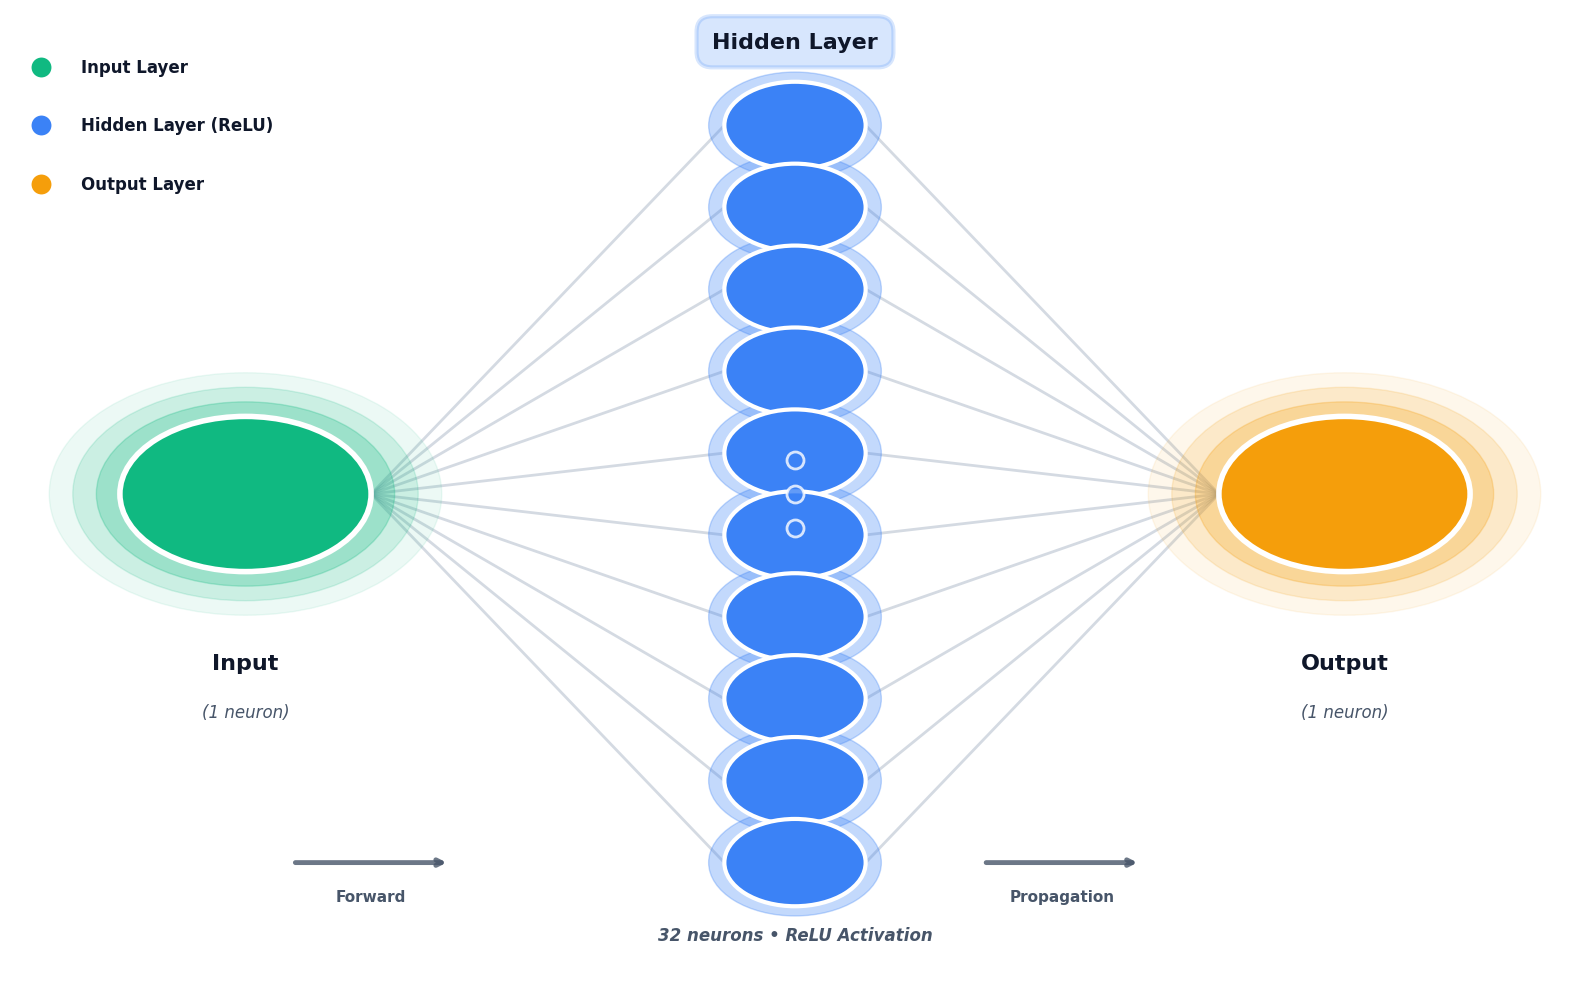

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

def plot_mlp_architecture_enhanced(input_neurons=1, hidden_neurons=32, output_neurons=1):
    """
    Visualisasi arsitektur MLP dengan desain yang lebih jelas
    """
    fig, ax = plt.subplots(figsize=(16, 10), facecolor='white')
    ax.set_facecolor('#ffffff')

    # Positioning layers - lebih lebar
    input_x = 0.15
    hidden_x = 0.5
    output_x = 0.85

    # Color palette yang lebih kontras
    colors = {
        'input': '#10b981',      # Green cerah
        'hidden': '#3b82f6',     # Blue cerah
        'output': '#f59e0b',     # Orange cerah
        'connection': '#94a3b8', # Gray lebih gelap
        'text': '#0f172a'        # Hitam pekat
    }

    # ==================== INPUT LAYER ====================
    # Neuron input lebih besar
    circle_input = plt.Circle((input_x, 0.5), 0.08, color=colors['input'],
                              ec='white', linewidth=4, zorder=10)
    ax.add_patch(circle_input)

    # Outer glow effect lebih jelas
    for size, alpha in [(0.095, 0.25), (0.11, 0.15), (0.125, 0.08)]:
        glow = plt.Circle((input_x, 0.5), size, color=colors['input'],
                         alpha=alpha, zorder=5)
        ax.add_patch(glow)

    # Label input lebih besar dan jelas
    ax.text(input_x, 0.32, "Input", ha='center', fontsize=16,
            weight='bold', color=colors['text'])
    ax.text(input_x, 0.27, "(1 neuron)", ha='center', fontsize=12,
            color='#475569', style='italic')

    # ==================== HIDDEN LAYER ====================
    hidden_positions = []

    # Tampilkan 10 neuron dengan spacing lebih besar
    display_count = 10
    for i in range(display_count):
        y = 0.88 - (i / (display_count - 1)) * 0.76
        hidden_positions.append(y)

    # Draw hidden neurons lebih besar
    for idx, y in enumerate(hidden_positions):
        # Main circle lebih besar
        circle = plt.Circle((hidden_x, y), 0.045, color=colors['hidden'],
                           ec='white', linewidth=3, zorder=10)
        ax.add_patch(circle)

        # Glow lebih visible
        glow = plt.Circle((hidden_x, y), 0.055, color=colors['hidden'],
                         alpha=0.3, zorder=5)
        ax.add_patch(glow)

    # Dots indicator lebih jelas jika ada lebih banyak neuron
    if hidden_neurons > display_count:
        mid_y = 0.5
        for i in range(3):
            dot_y = mid_y + (i - 1) * 0.035
            ax.scatter(hidden_x, dot_y, s=150, color=colors['hidden'],
                      alpha=0.8, zorder=10, edgecolors='white', linewidths=2)

    # Label hidden layer dengan box lebih tebal
    bbox_props = dict(boxstyle='round,pad=0.7', facecolor=colors['hidden'],
                     alpha=0.2, edgecolor=colors['hidden'], linewidth=3)
    ax.text(hidden_x, 0.96, f"Hidden Layer", ha='center', fontsize=16,
            weight='bold', color=colors['text'], bbox=bbox_props)
    ax.text(hidden_x, 0.04, f"{hidden_neurons} neurons • ReLU Activation",
            ha='center', fontsize=12, color='#475569', style='italic',
            weight='bold')

    # ==================== OUTPUT LAYER ====================
    # Neuron output lebih besar
    circle_output = plt.Circle((output_x, 0.5), 0.08, color=colors['output'],
                              ec='white', linewidth=4, zorder=10)
    ax.add_patch(circle_output)

    # Outer glow effect lebih jelas
    for size, alpha in [(0.095, 0.25), (0.11, 0.15), (0.125, 0.08)]:
        glow = plt.Circle((output_x, 0.5), size, color=colors['output'],
                         alpha=alpha, zorder=5)
        ax.add_patch(glow)

    # Label output lebih besar
    ax.text(output_x, 0.32, "Output", ha='center', fontsize=16,
            weight='bold', color=colors['text'])
    ax.text(output_x, 0.27, "(1 neuron)", ha='center', fontsize=12,
            color='#475569', style='italic')

    # ==================== CONNECTIONS ====================
    # Connections lebih tebal dan visible
    for y in hidden_positions:
        # Input → Hidden
        ax.plot([input_x + 0.08, hidden_x - 0.045], [0.5, y],
               color=colors['connection'], alpha=0.4, linewidth=2, zorder=1)

        # Hidden → Output
        ax.plot([hidden_x + 0.045, output_x - 0.08], [y, 0.5],
               color=colors['connection'], alpha=0.4, linewidth=2, zorder=1)

    # ==================== ARROWS & LABELS ====================
    # Arrow lebih tebal dan jelas
    arrow_props = dict(arrowstyle='->', lw=3.5, color='#475569', alpha=0.8)

    # Forward propagation arrows
    ax.annotate('', xy=(0.28, 0.12), xytext=(0.18, 0.12),
                arrowprops=arrow_props)
    ax.text(0.23, 0.08, 'Forward', ha='center', fontsize=11,
            color='#475569', weight='bold')

    ax.annotate('', xy=(0.72, 0.12), xytext=(0.62, 0.12),
                arrowprops=arrow_props)
    ax.text(0.67, 0.08, 'Propagation', ha='center', fontsize=11,
            color='#475569', weight='bold')

    # ==================== LEGEND ====================
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Legend box lebih besar dan jelas
    legend_y_start = 0.94
    legend_elements = [
        (colors['input'], "Input Layer"),
        (colors['hidden'], "Hidden Layer (ReLU)"),
        (colors['output'], "Output Layer")
    ]

    for idx, (color, label) in enumerate(legend_elements):
        y_pos = legend_y_start - idx * 0.06
        ax.scatter(0.02, y_pos, s=300, color=color, ec='white',
                  linewidth=3, zorder=10)
        ax.text(0.045, y_pos, label, va='center', fontsize=12,
               color=colors['text'], weight='bold')

    plt.tight_layout()
    plt.show()


# Panggil visualisasi
plot_mlp_architecture_enhanced(input_neurons=1, hidden_neurons=32, output_neurons=1)

# Forecasting IHSG dengan MLP

In [ ]:
# ===============================
# 1. SETUP AGAR TRAINING DETERMINISTIC (100% sama setiap run)
# ===============================
import os
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # Nonaktifkan GPU agar hasil stabil

import numpy as np
import tensorflow as tf
import random

seed = 42
os.environ["PYTHONHASHSEED"] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1_l2
import warnings
import time

# Ignore warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# Set seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)


## Data Loading

In [ ]:
import pandas as pd

df = pd.read_excel('/content/IHSG_data_1.xlsx')
df.head()


# Potong data hingga 4 tahun terakhir (2021-2025)
df['Price'] = pd.to_datetime(df['Price'])
df = df[df['Price'] >= '2024-02-01'].reset_index(drop=True)

# Tampilkan 5 baris pertama
print(f"Data setelah dipotong: {len(df)} entries")
print(f"Periode: {df['Price'].min()} hingga {df['Price'].max()}")
print()
print(df.head())


Data setelah dipotong: 416 entries
Periode: 2024-02-01 00:00:00 hingga 2025-11-07 00:00:00

       Price        Close         High          Low         Open     Volume
0 2024-02-01  7201.695801  7248.529785  7191.694824  7221.852051  157409100
1 2024-02-02  7238.785156  7238.785156  7180.356934  7221.900879  114364900
2 2024-02-05  7198.615234  7254.088867  7186.170898  7237.334961  137325900
3 2024-02-06  7247.408203  7268.131836  7212.140137  7230.148926  138020300
4 2024-02-07  7235.151855  7285.127930  7225.449219  7264.976074  138054800


In [ ]:
len(df['Close'])

416

## Data Preparation

In [ ]:
# Persiapan data
df = df.sort_values('Price')
df.reset_index(drop=True, inplace=True)

print("Shape data:", df.shape)
print("\nInfo data:")
print(df.info())
print("\nStatistik deskriptif:")
print(df.describe())

Shape data: (416, 6)

Info data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Price   416 non-null    datetime64[ns]
 1   Close   416 non-null    float64       
 2   High    416 non-null    float64       
 3   Low     416 non-null    float64       
 4   Open    416 non-null    float64       
 5   Volume  416 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 19.6 KB
None

Statistik deskriptif:
                               Price        Close         High          Low  \
count                            416   416.000000   416.000000   416.000000   
mean   2024-12-25 05:14:59.999999744  7289.341285  7335.916965  7246.790038   
min              2024-02-01 00:00:00  5967.987793  6036.554199  5882.604980   
25%              2024-07-22 18:00:00  7056.599121  7102.943604  7008.014893   
50%              2

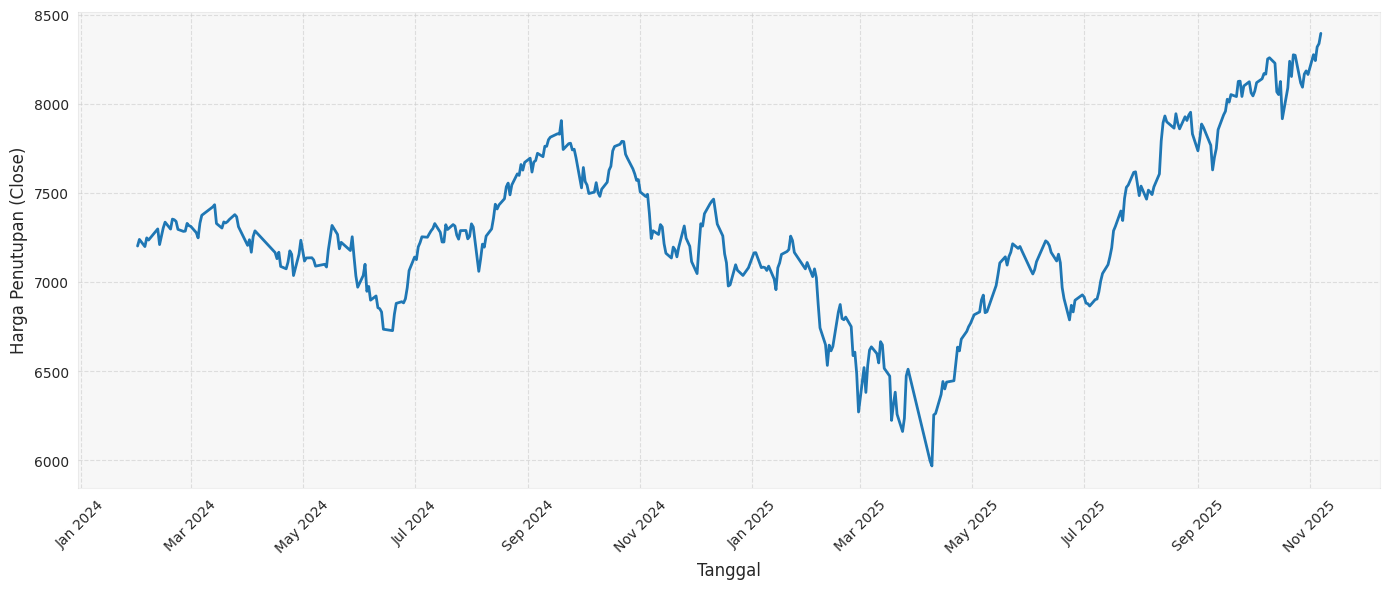

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))

# Plot garis
plt.plot(df['Price'], df['Close'], linewidth=2)


# Label
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Penutupan (Close)', fontsize=12)

# Grid halus
plt.grid(True, linestyle='--', alpha=0.6)

# Format tanggal
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # setiap 2 bulan
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Background style
plt.gca().set_facecolor('#f7f7f7')

# Frame border
for spine in plt.gca().spines.values():
    spine.set_alpha(0.3)

plt.tight_layout()
plt.show()


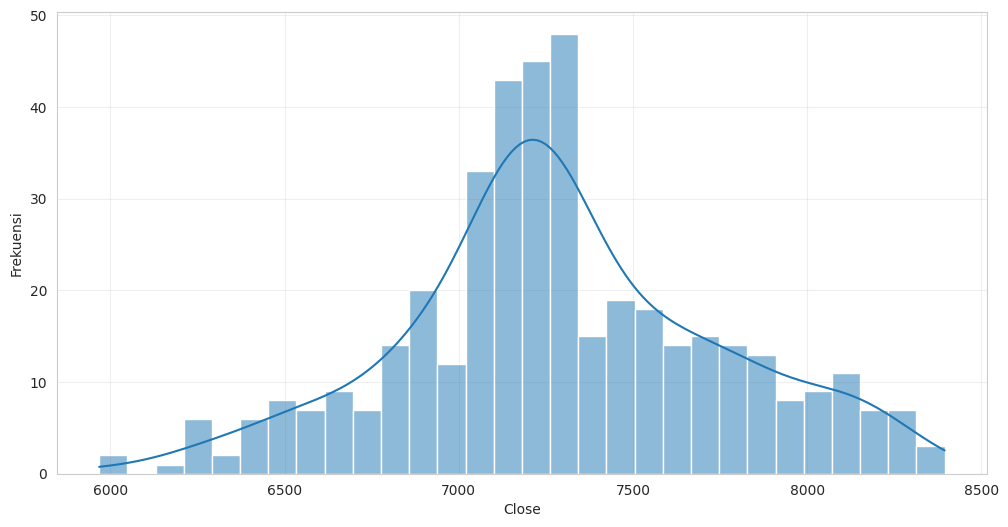

In [ ]:
import seaborn as sns

# ===============================
# 4. Histogram Distribusi Harga Close
# ===============================
plt.figure(figsize=(12,6))
sns.histplot(df['Close'], bins=30, kde=True)
plt.xlabel('Close')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)
plt.show()

## Feature Engineering

In [ ]:
# Buat features
print("\nMenggunakan hanya variabel 'Close'...")

# Gunakan 'Close' sebagai input dan target untuk forecasting satu langkah ke depan
X = df['Close'][:-1].values.reshape(-1, 1)  # Semua kecuali yang terakhir
y = df['Close'][1:].values  # Semua kecuali yang pertama

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

# ====================================
# 3. TRAIN-TEST SPLIT (Tanpa Validation)
# ====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, shuffle=False
)

print("\nData split:")
print(f"Training: {X_train.shape[0]} samples")
print(f"Testing: {X_test.shape[0]} samples")


Menggunakan hanya variabel 'Close'...
Shape X: (415, 1)
Shape y: (415,)

Data split:
Training: 352 samples
Testing: 63 samples


## Data Normalization

In [ ]:
# 4. SCALING
# ====================================
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

## Model Definition

In [ ]:
# 5. MODEL BUILDER (1 hidden layer, activation flexible)
# ====================================
def create_mlp_model(input_dim, optimizer, activation):

    model = Sequential()

    # Hidden layer
    if activation == "leakyrelu":
        model.add(Dense(32, input_dim=input_dim))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(32, activation=activation, input_dim=input_dim))

    # Output layer
    model.add(Dense(1))

    # Compile
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

## Optimizer Configuration

In [ ]:
# ===============================
# 4. OPTIMIZER
# ===============================
optimizers_dict = {
    "Adam": tf.keras.optimizers.Adam(),
    "Nadam": tf.keras.optimizers.Nadam(),
    "RMSprop": tf.keras.optimizers.RMSprop(),
    "SGD": tf.keras.optimizers.SGD(),
}


## Model Training

In [ ]:
# ===============================
# 3. MODEL BUILDER (ReLU saja)
# ===============================
def create_mlp_model(input_dim, optimizer):

    initializer = tf.keras.initializers.GlorotUniform(seed=42)

    model = Sequential([
        Dense(32, activation='relu', kernel_initializer=initializer,
              input_dim=input_dim),
        Dense(1, kernel_initializer=initializer)
    ])

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [ ]:
# 5. TRAINING LOOP (DETERMINISTIC)
# ============================================

results = {}
predictions = {}
histories = {}   # <-- simpan semua history optimizer

print("\n" + "="*80)
print("TRAINING MLP (ReLU-only, Deterministic + EarlyStopping)")
print("="*80)

for opt_name, optimizer in optimizers_dict.items():

    print(f"\n=== Training optimizer: {opt_name} ===")

    # reset seed agar training konsisten
    np.random.seed(42)
    tf.random.set_seed(42)
    random.seed(42)

    # build model
    model = create_mlp_model(
        input_dim=X_train_scaled.shape[1],
        optimizer=optimizer
    )

    # Callbacks
    callbacks = [
        ReduceLROnPlateau(
            monitor='loss',
           factor=0.5,
            patience=10,
            min_lr=1e-7,
            verbose=0
        ),
        EarlyStopping(
            monitor='loss',
            patience=20,
            restore_best_weights=True,
            verbose=1
        )
    ]

    # Runtime start
    start_time = time.time()

    # Train
    history = model.fit(
        X_train_scaled, y_train_scaled,
        epochs=200,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )

    # Save history untuk plotting
    histories[opt_name] = history

    # Runtime end
    end_time = time.time()
    runtime = end_time - start_time

    # Predict
    y_pred_scaled = model.predict(X_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Simpan prediksi
    predictions[opt_name] = y_pred.flatten()

    # Evaluasi
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100

    results[opt_name] = {
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape,
        "Runtime (s)": runtime,
        "model": model
    }

    print(f"  RMSE: {rmse:.2f} | MAE: {mae:.2f} | . MAPE: {mape:.2f}%")
    print(f"  Runtime: {runtime:.2f} seconds")



TRAINING MLP (ReLU-only, Deterministic + EarlyStopping)

=== Training optimizer: Adam ===
Restoring model weights from the end of the best epoch: 198.
  RMSE: 86.35 | MAE: 70.22 | . MAPE: 0.88%
  Runtime: 79.97 seconds

=== Training optimizer: Nadam ===
Restoring model weights from the end of the best epoch: 199.
  RMSE: 88.37 | MAE: 72.86 | . MAPE: 0.91%
  Runtime: 103.94 seconds

=== Training optimizer: RMSprop ===
Epoch 185: early stopping
Restoring model weights from the end of the best epoch: 165.
  RMSE: 84.11 | MAE: 67.72 | . MAPE: 0.85%
  Runtime: 58.72 seconds

=== Training optimizer: SGD ===
Restoring model weights from the end of the best epoch: 200.
  RMSE: 136.42 | MAE: 122.33 | . MAPE: 1.52%
  Runtime: 52.80 seconds


In [ ]:
# ============================================
# 6. CARI OPTIMIZER TERBAIK
# ============================================

best_optimizer_name = min(results, key=lambda k: results[k]["RMSE"])
print("\nBest optimizer:", best_optimizer_name)


Best optimizer: RMSprop


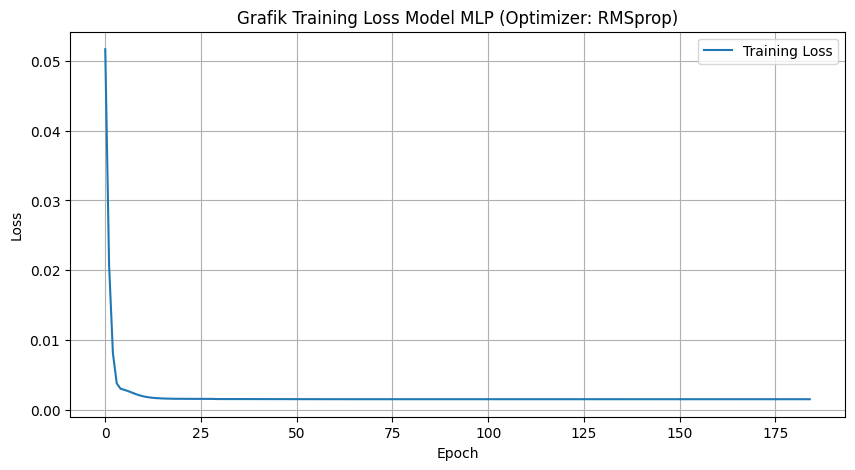

In [ ]:
best_history = histories[best_optimizer_name].history

plt.figure(figsize=(10, 5))
plt.plot(best_history["loss"], label="Training Loss")
plt.title(f"Grafik Training Loss Model MLP (Optimizer: {best_optimizer_name})")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

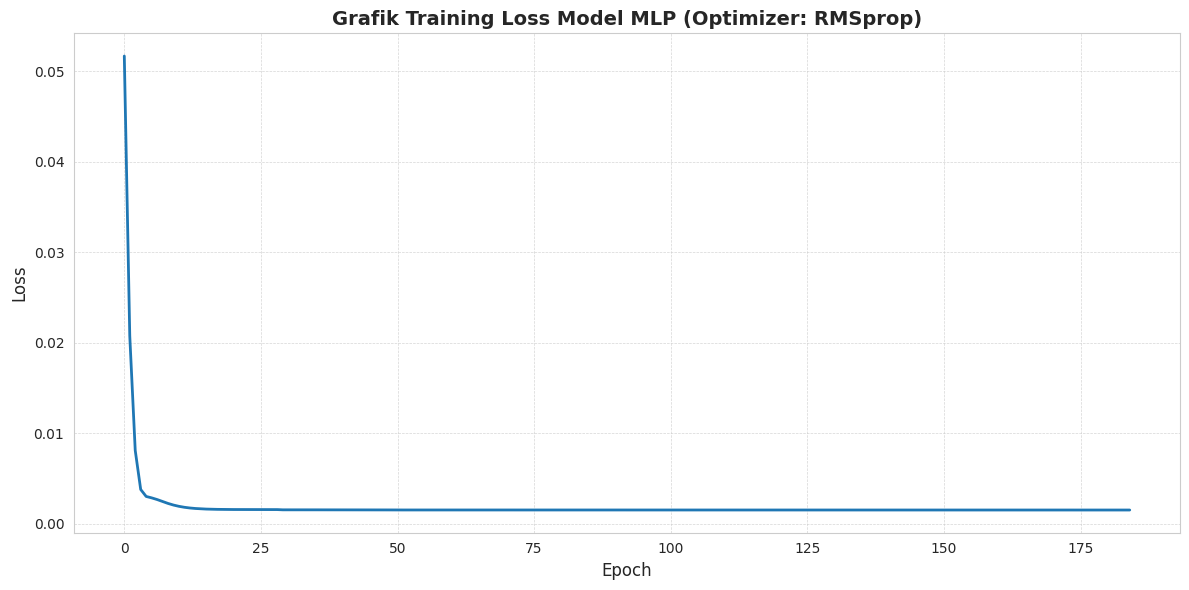

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gunakan style yang lebih profesional
sns.set_style("whitegrid")

# Ambil history RMSprop
history_rmsprop = histories["RMSprop"]

plt.figure(figsize=(12, 6))

# Plot training loss
plt.plot(best_history["loss"], linewidth=2)

# Judul & Label
plt.title("Grafik Training Loss Model MLP (Optimizer: RMSprop)", fontsize=14, fontweight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)

# Grid tipis agar lebih elegan
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.8)

# Batas margin lebih rapi
plt.tight_layout()

plt.show()


In [ ]:
# Buat DataFrame untuk mengecek hasil testing
t_results = pd.DataFrame({
    "Actual": y_test.flatten(),
    "Predicted": predictions[best_optimizer_name],  # misalnya ambil yang terbaik
})

# Tampilkan 10 baris pertama
print(t_results.head(10))


        Actual    Predicted
0  7605.924805  7526.325684
1  7791.696777  7597.311523
2  7892.911133  7779.103516
3  7931.250977  7878.149414
4  7898.375000  7915.667969
5  7862.949219  7883.496582
6  7943.825195  7848.829102
7  7890.714844  7927.972168
8  7858.851074  7876.000000
9  7926.907227  7844.818848


In [ ]:
# --- AUTO RECOVERY jika predictions kosong ---
if len(predictions) == 0:
    print("Predictions kosong → menjalankan ulang proses prediksi model terbaik...")

    # Ambil kembali model terbaik dari results
    best_model = results[best_optimizer_name]["model"]

    # Generate prediksi ulang
    y_pred_scaled = best_model.predict(X_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # Simpan lagi supaya tidak error
    predictions[best_optimizer_name] = y_pred.flatten()

    print("Predictions berhasil dibuat ulang.")


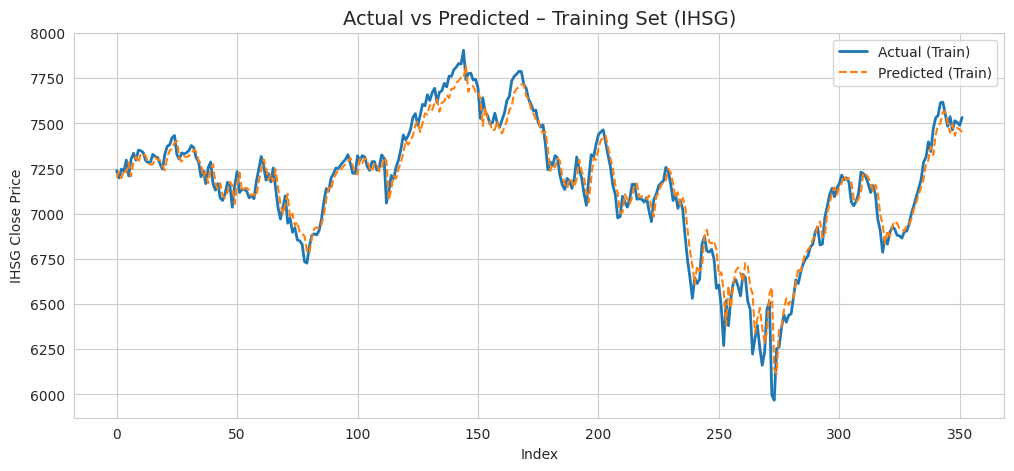

In [ ]:
# Prediksi training
y_train_pred_scaled = model.predict(X_train_scaled, verbose=0)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)

plt.figure(figsize=(12,5))
plt.plot(y_train.flatten(), label="Actual (Train)", linewidth=2)
plt.plot(y_train_pred.flatten(), label="Predicted (Train)", linestyle='--')
plt.title("Actual vs Predicted – Training Set (IHSG)", fontsize=14)
plt.xlabel("Index")
plt.ylabel("IHSG Close Price")
plt.legend()
plt.grid(True)
plt.show()


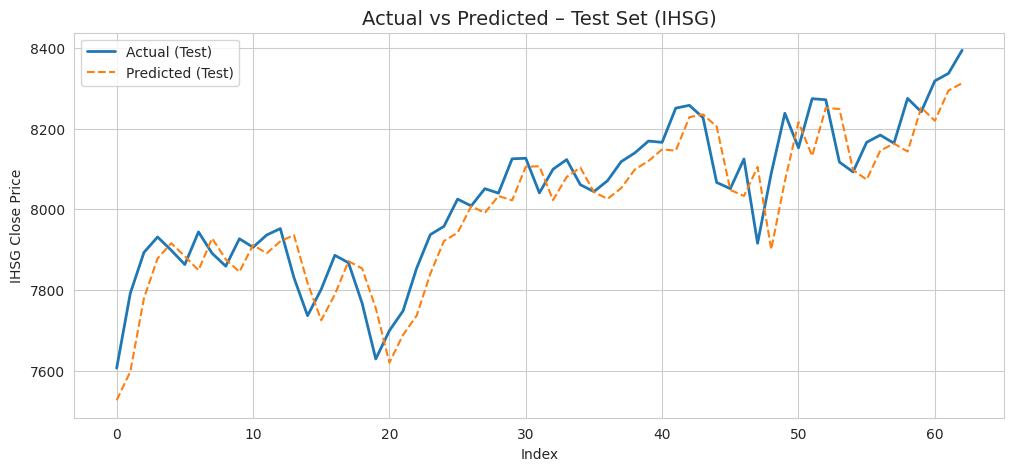

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.flatten(), label="Actual (Test)", linewidth=2)
plt.plot(predictions[best_optimizer_name], label="Predicted (Test)", linestyle='--')
plt.title("Actual vs Predicted – Test Set (IHSG)", fontsize=14)
plt.xlabel("Index")
plt.ylabel("IHSG Close Price")
plt.legend()
plt.grid(True)
plt.show()


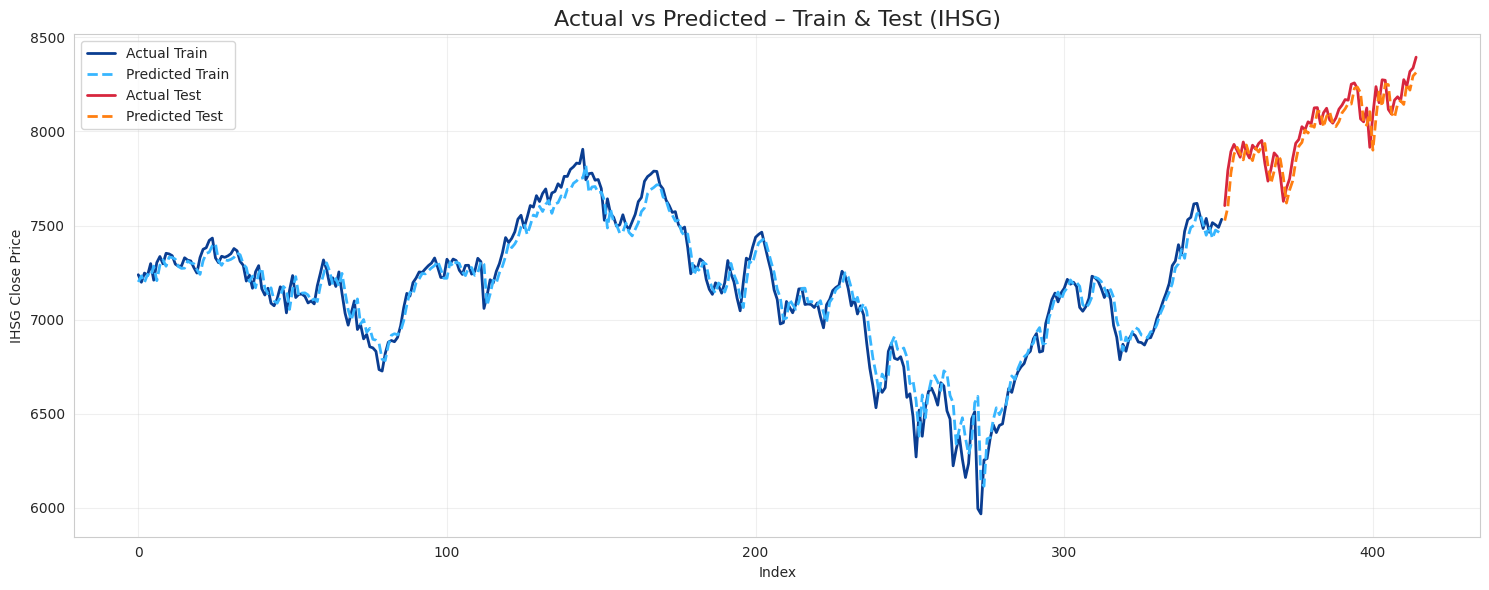

In [ ]:
plt.figure(figsize=(15,6))

# Train actual
plt.plot(y_train.flatten(), label="Actual Train", color="#0A3D91", linewidth=2)

# Train predicted
plt.plot(y_train_pred.flatten(), label="Predicted Train",
         color="#37B6FF", linestyle='--', linewidth=2)

# Test actual
start_test = len(y_train)
plt.plot(range(start_test, start_test + len(y_test)),
         y_test.flatten(), label="Actual Test",
         color="#D7263D", linewidth=2)

# Test predicted
plt.plot(range(start_test, start_test + len(y_test)),
         predictions[best_optimizer_name], label="Predicted Test",
         color="#FF7F11", linestyle='--', linewidth=2)

plt.title("Actual vs Predicted – Train & Test (IHSG)", fontsize=16)
plt.xlabel("Index")
plt.ylabel("IHSG Close Price")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
predictions.keys()


dict_keys(['Adam', 'Nadam', 'RMSprop', 'SGD'])

In [ ]:
total_len = len(df)
train_len = len(y_train)
test_len = len(y_test)


In [ ]:
dates = df.index.to_list()

train_dates = dates[:train_len]
test_dates  = dates[train_len:train_len + test_len]


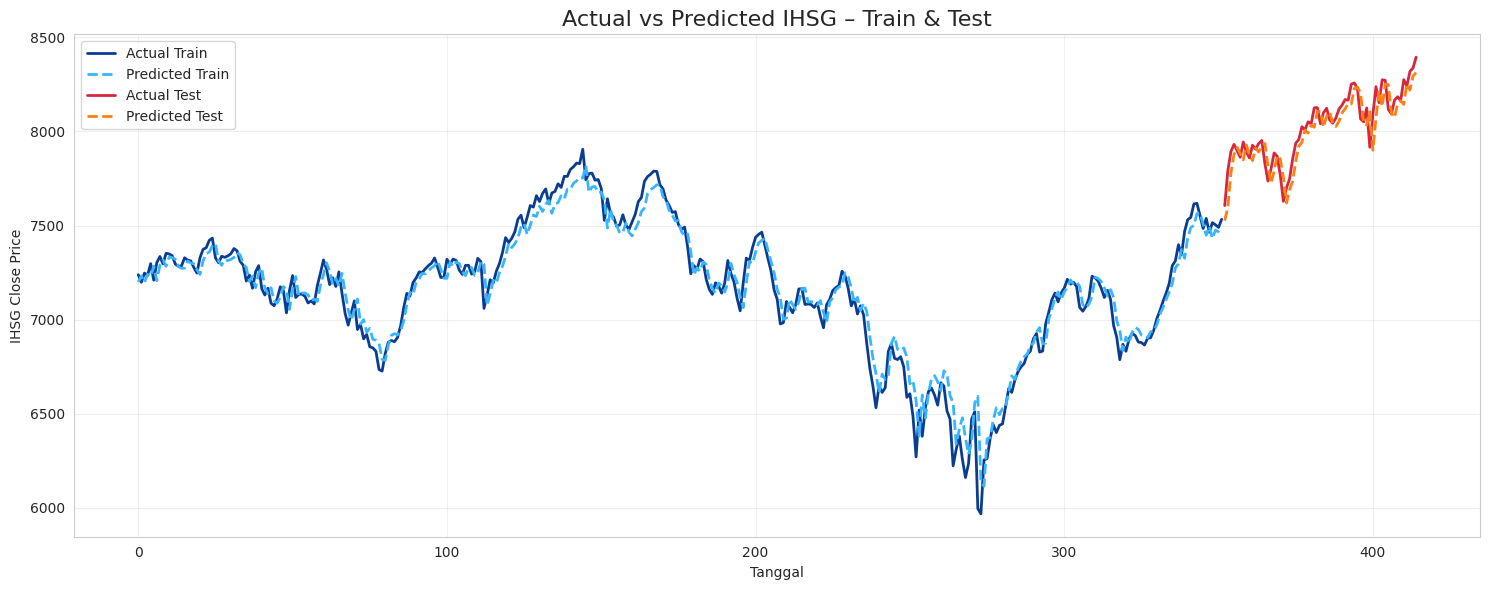

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(train_dates, y_train.flatten(),
         label="Actual Train", color="#0A3D91", linewidth=2)

plt.plot(train_dates, y_train_pred.flatten(),
         label="Predicted Train", color="#37B6FF", linestyle='--', linewidth=2)

plt.plot(test_dates, y_test.flatten(),
         label="Actual Test", color="#D7263D", linewidth=2)

plt.plot(test_dates, predictions[best_optimizer_name],
         label="Predicted Test", color="#FF7F11", linestyle='--', linewidth=2)

plt.title("Actual vs Predicted IHSG – Train & Test", fontsize=16)
plt.xlabel("Tanggal")
plt.ylabel("IHSG Close Price")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


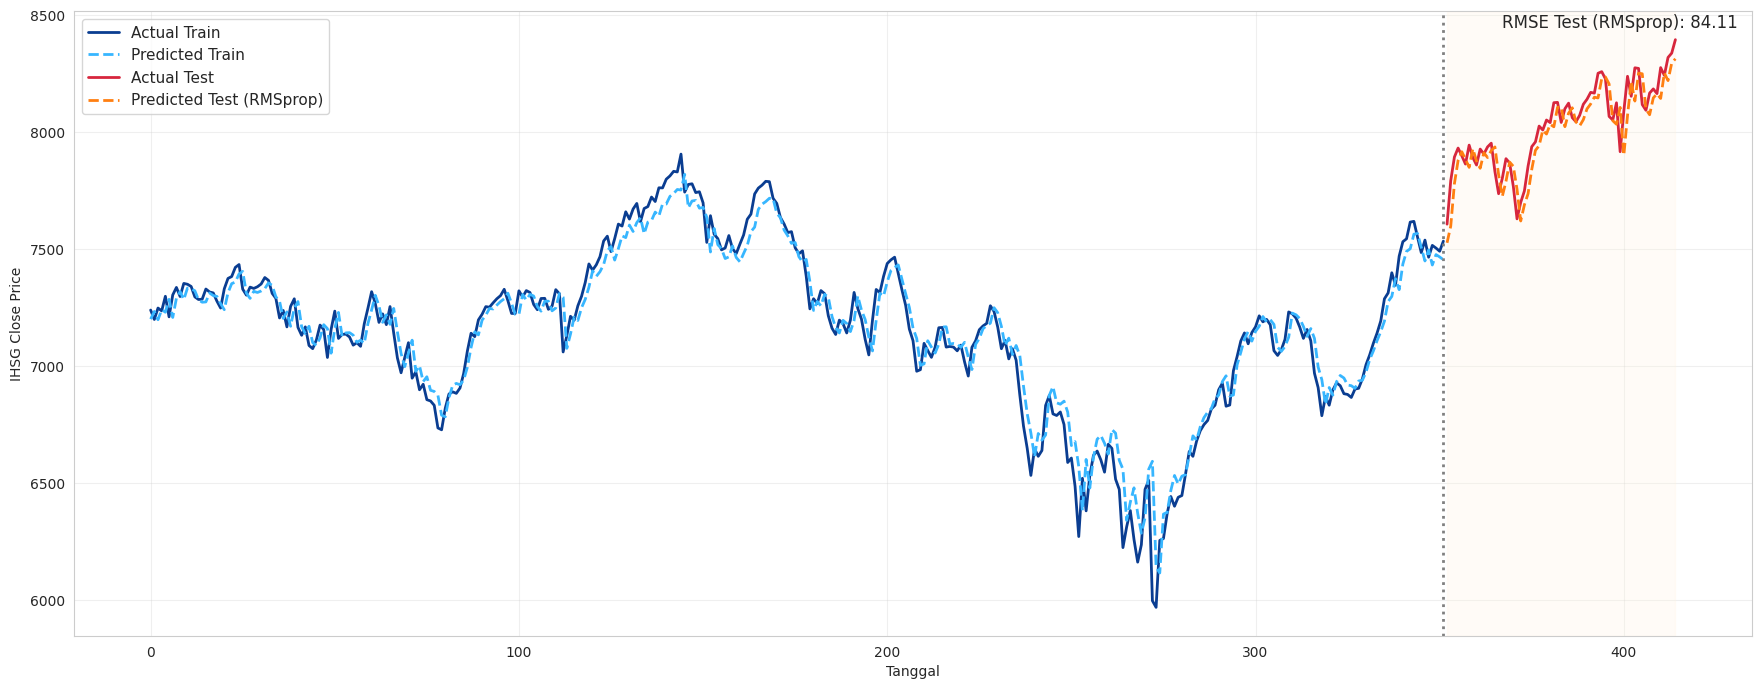

In [ ]:
plt.figure(figsize=(18,7))

# ----------- Plot Train -----------
plt.plot(train_dates, y_train.flatten(),
         label="Actual Train", color="#0A3D91", linewidth=2)
plt.plot(train_dates, y_train_pred.flatten(),
         label="Predicted Train", color="#37B6FF",
         linestyle='--', linewidth=2)

# ----------- Plot Test -----------
plt.plot(test_dates, y_test.flatten(),
         label="Actual Test", color="#D7263D", linewidth=2)
plt.plot(test_dates, predictions[best_optimizer_name],
         label="Predicted Test (RMSprop)", color="#FF7F11",
         linestyle='--', linewidth=2)

# ----------- RMSE -----------
rmse_test = np.sqrt(np.mean((y_test.flatten() -
                             predictions[best_optimizer_name])**2))
plt.text(test_dates[len(test_dates)//4],
         max(y_train.max(), y_test.max()) + 50,
         f"RMSE Test (RMSprop): {rmse_test:.2f}",
         fontsize=12)

# ----------- Split line -----------
plt.axvline(train_dates[-1], color="gray", linestyle=":", linewidth=2)

# ----------- Test shaded area -----------
plt.axvspan(test_dates[0], test_dates[-1],
            color="#FFF3E0", alpha=0.25)



# ----------- Cosmetics -----------
plt.xlabel("Tanggal")
plt.ylabel("IHSG Close Price")
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
df.index[:10], df.index.is_monotonic_increasing


(RangeIndex(start=0, stop=10, step=1), True)

In [ ]:
best_model = results[best_optimizer_name]["model"]

In [ ]:
future_steps = 30
future_predictions = []

# Mulai dari data terakhir pada X_test
last_input = X_test_scaled[-1].reshape(1, -1)

for _ in range(future_steps):
    # Prediksi 1 langkah ke depan
    next_scaled = best_model.predict(last_input, verbose=0)
    next_pred = scaler_y.inverse_transform(next_scaled)[0][0]
    future_predictions.append(next_pred)

    # Update input dengan memasukkan hasil prediksi ke lag
    new_input = last_input.flatten()[1:].tolist()  # geser
    new_input.append(next_scaled[0][0])            # tambahkan prediksi baru (scaled)
    last_input = np.array(new_input).reshape(1, -1)


In [ ]:
last_date = df['Price'].iloc[-1]           # tanggal terakhir di dataset IHSG
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1),
                             periods=future_steps,
                             freq='B')      # B = business days (hari bursa)


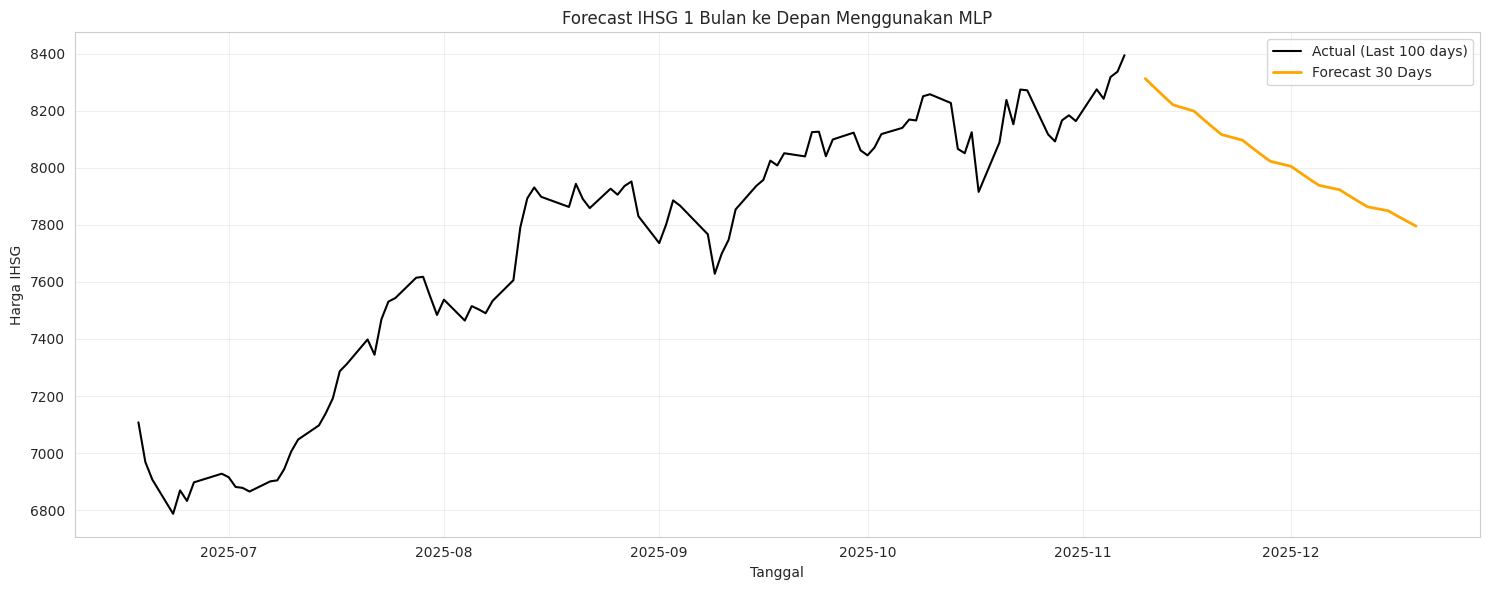

In [ ]:
plt.figure(figsize=(15,6))

# Plot aktual 100 hari terakhir
plt.plot(df['Price'].iloc[-100:], df['Close'].iloc[-100:],
         label='Actual (Last 100 days)', color='black')

# Plot forecast
plt.plot(future_dates, future_predictions,
         label='Forecast 30 Days', color='orange', linewidth=2)

plt.title('Forecast IHSG 1 Bulan ke Depan Menggunakan MLP')
plt.xlabel('Tanggal')
plt.ylabel('Harga IHSG')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

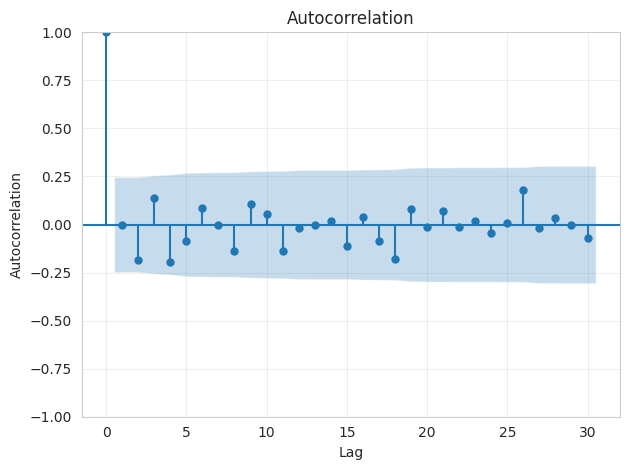


Statistik Residuals:
Mean : 31.021523
Std  : 78.178856
Min  : -189.372559
Max  : 194.385254


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

# --- Safety check: pastikan residuals ada ---
if 'residuals' not in globals():
    print("Residuals belum dihitung. Menghitung ulang dari model terbaik...")

    best_model = results[best_optimizer_name]["model"]
    y_pred_scaled = best_model.predict(X_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    residuals = y_test.flatten() - y_pred.flatten()
    print("Residuals berhasil dibuat.")

# --- Plot ACF ---
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=30, alpha=0.05)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Statistik Residual ---
print("\nStatistik Residuals:")
print(f"Mean : {np.mean(residuals):.6f}")
print(f"Std  : {np.std(residuals):.6f}")
print(f"Min  : {np.min(residuals):.6f}")
print(f"Max  : {np.max(residuals):.6f}")


NameError: name 'best_key' is not defined

<Figure size 1200x600 with 0 Axes>

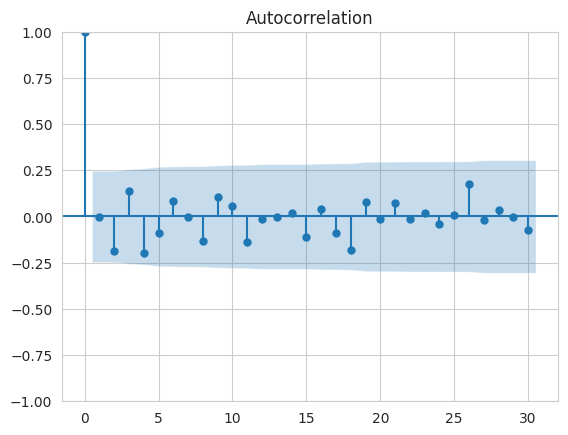

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=30, alpha=0.05)
plt.title(f"ACF Residuals - Model: {best_key}", fontsize=14, fontweight="bold")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.grid(alpha=0.3)
plt.show()

print("\nStatistik Residual:")
print(f"Mean: {np.mean(residuals):.6f}")
print(f"Std : {np.std(residuals):.6f}")
print(f"Min : {np.min(residuals):.6f}")
print(f"Max : {np.max(residuals):.6f}")


## code kebwah ini belum rapih

In [ ]:
# ====================================
# 9. TAMPILKAN HASIL
# ====================================
print("\n" + "="*80)
print("HASIL PERFORMA SEMUA AKTIVASI + OPTIMIZER")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')

print(results_df.to_string())

In [ ]:
optimizer_factory = {
    "Adam": lambda: Adam(learning_rate=1e-3),
    "Nadam": lambda: Nadam(learning_rate=1e-3),
    "RMSprop": lambda: RMSprop(learning_rate=1e-3),
    "Adadelta": lambda: Adadelta(learning_rate=1e-3),
    "Adagrad": lambda: Adagrad(learning_rate=1e-3),
    "SGD": lambda: SGD(learning_rate=1e-3),
    "Adamax": lambda: Adamax(learning_rate=1e-3)
}


In [ ]:
print("="*80)
print("TRAINING MLP (Aktivasi: LEAKYRELU saja, tanpa validation)")
print("="*80)

activation_used = "leakyrelu"
results = {}

for opt_name, opt_fn in optimizer_factory.items():
    print(f"\n=== Optimizer: {opt_name} ===")

    # SET SEED
    np.random.seed(42)
    tf.random.set_seed(42)

    # BUAT OPTIMIZER BARU SETIAP LOOP
    optimizer = opt_fn()

    # BUILD MODEL
    model = create_mlp_model(
        input_dim=X_train_scaled.shape[1],
        optimizer=optimizer,
        activation=activation_used
    )

    # CALLBACK
    callbacks = [
        ReduceLROnPlateau(
            monitor='loss',
            factor=0.5,
            patience=15,
            min_lr=1e-7,
            verbose=0
        )
    ]

    # TRAIN
    history = model.fit(
        X_train_scaled, y_train_scaled,
        epochs=100,
        batch_size=32,
        callbacks=callbacks,
        verbose=0
    )

    # PREDICT
    y_pred_scaled = model.predict(X_test_scaled, verbose=0)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    # METRICS
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred.flatten()) / y_test)) * 100

    # SAVE
    results[opt_name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    }

    print(f"  RMSE: {rmse:.2f} | MAE: {mae:.2f} | R²: {r2:.4f} | MAPE: {mape:.2f}%")


In [ ]:
# ====================================
# 9. TAMPILKAN HASIL
# ====================================
print("\n" + "="*80)
print("HASIL PERFORMA SEMUA AKTIVASI + OPTIMIZER")
print("="*80)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')

print(results_df.to_string())

## Results Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# === RELU RESULTS ===
results_relu = {
    "Adam":      {"RMSE": 202.10, "MAE": 186.76, "R2": -0.2732, "MAPE": 2.31},
    "Nadam":     {"RMSE": 135.33, "MAE": 121.29, "R2": 0.4292, "MAPE": 1.50},
    "RMSprop":   {"RMSE": 84.10,  "MAE": 68.00,  "R2": 0.7795, "MAPE": 0.85},
    "Adadelta":  {"RMSE": 86.42,  "MAE": 71.43,  "R2": 0.7672, "MAPE": 0.89},
    "Adagrad":   {"RMSE": 315.17, "MAE": 300.49, "R2": -2.0961, "MAPE": 3.72},
    "SGD":       {"RMSE": 84.20,  "MAE": 68.05,  "R2": 0.7790, "MAPE": 0.85},
    "Adamax":    {"RMSE": 132.75, "MAE": 118.83, "R2": 0.4507, "MAPE": 1.47}
}

# === LEAKYRELU RESULTS ===
results_leakyrelu = {
    "Adam":      {"RMSE": 89.42,  "MAE": 74.40,  "R2": 0.7508, "MAPE": 0.93},
    "Nadam":     {"RMSE": 139.74, "MAE": 122.91, "R2": 0.3914, "MAPE": 1.52},
    "RMSprop":   {"RMSE": 94.46,  "MAE": 80.44,  "R2": 0.7219, "MAPE": 1.00},
    "Adadelta":  {"RMSE": 1581.58,"MAE": 1575.14,"R2": -76.9679, "MAPE": 19.59},
    "Adagrad":   {"RMSE": 875.52, "MAE": 867.59, "R2": -22.8927, "MAPE": 10.78},
    "SGD":       {"RMSE": 452.16, "MAE": 439.51, "R2": -5.3726, "MAPE": 5.45},
    "Adamax":    {"RMSE": 238.61, "MAE": 224.41, "R2": -0.7746, "MAPE": 2.78}
}

# 1. SUBPLOT: Semua metrik dalam satu figure
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Komparasi Performa Optimizer: ReLU vs LeakyReLU',
             fontsize=16, fontweight='bold', y=1.00)

optimizers = list(results_relu.keys())
x = np.arange(len(optimizers))
width = 0.35

metrics = ['RMSE', 'MAE', 'R2', 'MAPE']
colors_relu = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
colors_leaky = ['#C44569', '#2C3A47', '#0984e3', '#E17055']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    relu_values = [results_relu[opt][metric] for opt in optimizers]
    leaky_values = [results_leakyrelu[opt][metric] for opt in optimizers]

    bars1 = ax.bar(x - width/2, relu_values, width, label='ReLU',
                   color=colors_relu[idx], alpha=0.8, edgecolor='black', linewidth=1.2)
    bars2 = ax.bar(x + width/2, leaky_values, width, label='LeakyReLU',
                   color=colors_leaky[idx], alpha=0.8, edgecolor='black', linewidth=1.2)

    # Tambahkan nilai di atas bar
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            if abs(height) < 100:
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom',
                       fontsize=8, fontweight='bold')

    ax.set_xlabel('Optimizer', fontsize=11, fontweight='bold')
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold', pad=10)
    ax.set_xticks(x)
    ax.set_xticklabels(optimizers, rotation=45, ha='right')
    ax.legend(loc='upper right', framealpha=0.9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Highlight best performer
    if metric == 'R2':
        best_relu_idx = relu_values.index(max(relu_values))
        best_leaky_idx = leaky_values.index(max(leaky_values))
    else:
        best_relu_idx = relu_values.index(min(relu_values))
        best_leaky_idx = leaky_values.index(min(leaky_values))

    bars1[best_relu_idx].set_edgecolor('gold')
    bars1[best_relu_idx].set_linewidth(3)
    bars2[best_leaky_idx].set_edgecolor('gold')
    bars2[best_leaky_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

# 2. HEATMAP: Perbandingan performa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Heatmap Performa Optimizer', fontsize=16, fontweight='bold')

# Prepare data untuk heatmap
metrics = ['RMSE', 'MAE', 'R2', 'MAPE']
relu_matrix = np.array([[results_relu[opt][m] for m in metrics] for opt in optimizers])
leaky_matrix = np.array([[results_leakyrelu[opt][m] for m in metrics] for opt in optimizers])

# Normalize untuk visualisasi yang lebih baik (untuk R2, nilai lebih tinggi lebih baik)
relu_norm = relu_matrix.copy()
leaky_norm = leaky_matrix.copy()

# ReLU Heatmap
sns.heatmap(relu_norm, annot=True, fmt='.2f', cmap='RdYlGn_r',
            xticklabels=metrics, yticklabels=optimizers,
            ax=ax1, cbar_kws={'label': 'Nilai Metrik'}, linewidths=0.5)
ax1.set_title('ReLU Activation', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Metrik', fontsize=12, fontweight='bold')
ax1.set_ylabel('Optimizer', fontsize=12, fontweight='bold')

# LeakyReLU Heatmap
sns.heatmap(leaky_norm, annot=True, fmt='.2f', cmap='RdYlGn_r',
            xticklabels=metrics, yticklabels=optimizers,
            ax=ax2, cbar_kws={'label': 'Nilai Metrik'}, linewidths=0.5)
ax2.set_title('LeakyReLU Activation', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Metrik', fontsize=12, fontweight='bold')
ax2.set_ylabel('Optimizer', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. RANKING: Top 3 Performers
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Top 3 Optimizer untuk Setiap Metrik', fontsize=16, fontweight='bold', y=0.995)

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    # Calculate combined scores
    scores = {}
    for opt in optimizers:
        relu_val = results_relu[opt][metric]
        leaky_val = results_leakyrelu[opt][metric]
        # Untuk R2, nilai lebih tinggi lebih baik
        if metric == 'R2':
            scores[opt] = (relu_val + leaky_val) / 2
        else:
            scores[opt] = (relu_val + leaky_val) / 2

    # Sort dan ambil top 3
    if metric == 'R2':
        sorted_opts = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:3]
    else:
        sorted_opts = sorted(scores.items(), key=lambda x: x[1])[:3]

    opts_sorted = [x[0] for x in sorted_opts]
    y_pos = np.arange(len(opts_sorted))

    # Plot
    relu_vals = [results_relu[opt][metric] for opt in opts_sorted]
    leaky_vals = [results_leakyrelu[opt][metric] for opt in opts_sorted]

    ax.barh(y_pos - 0.2, relu_vals, 0.4, label='ReLU',
            color='#3498db', alpha=0.8, edgecolor='black')
    ax.barh(y_pos + 0.2, leaky_vals, 0.4, label='LeakyReLU',
            color='#e74c3c', alpha=0.8, edgecolor='black')

    ax.set_yticks(y_pos)
    ax.set_yticklabels(opts_sorted)
    ax.invert_yaxis()
    ax.set_xlabel(f'{metric} Value', fontsize=11, fontweight='bold')
    ax.set_title(f'Top 3 untuk {metric}', fontsize=12, fontweight='bold', pad=10)
    ax.legend(loc='best')
    ax.grid(axis='x', alpha=0.3, linestyle='--')

    # Tambahkan nilai
    for i, (r_val, l_val) in enumerate(zip(relu_vals, leaky_vals)):
        ax.text(r_val, i-0.2, f' {r_val:.2f}', va='center', fontsize=9, fontweight='bold')
        ax.text(l_val, i+0.2, f' {l_val:.2f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# 4. SUMMARY TABLE
print("\n" + "="*80)
print("SUMMARY: Best Optimizer untuk Setiap Metrik")
print("="*80)
for metric in metrics:
    print(f"\n{metric}:")
    print("-" * 40)

    # ReLU best
    if metric == 'R2':
        best_relu = max(results_relu.items(), key=lambda x: x[1][metric])
        best_leaky = max(results_leakyrelu.items(), key=lambda x: x[1][metric])
    else:
        best_relu = min(results_relu.items(), key=lambda x: x[1][metric])
        best_leaky = min(results_leakyrelu.items(), key=lambda x: x[1][metric])

    print(f"  ReLU     : {best_relu[0]:10s} = {best_relu[1][metric]:8.2f}")
    print(f"  LeakyReLU: {best_leaky[0]:10s} = {best_leaky[1][metric]:8.2f}")

print("\n" + "="*80)

In [ ]:
# Visualisasi 2: Training History Top 3
best_3 = results_df.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Training & Validation Loss - Top 3 Optimizers', fontsize=14, fontweight='bold')

for idx, opt_name in enumerate(best_3):
    ax = axes[idx]
    history = histories[opt_name]

    epochs = range(1, len(history.history['loss']) + 1)
    ax.plot(epochs, history.history['loss'], 'b-', label='Train Loss', linewidth=2)
    ax.plot(epochs, history.history['val_loss'], 'r--', label='Val Loss', linewidth=2)

    ax.set_title(f'{opt_name}\nRMSE: {results[opt_name]["RMSE"]:.2f}', fontweight='bold')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi 3: Prediksi vs Aktual untuk Top 3
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

for idx, opt_name in enumerate(best_3):
    ax = axes[idx]
    y_pred = predictions[opt_name]

    x_axis = range(len(y_test))
    ax.plot(x_axis, y_test, label='Actual', color='blue', linewidth=2.5, alpha=0.7)
    ax.plot(x_axis, y_pred, label='Predicted', color='red', linewidth=2.5, alpha=0.7)
    ax.fill_between(x_axis, y_test, y_pred.flatten(), alpha=0.2)

    # Add metrics
    metrics_text = (f"RMSE: {results[opt_name]['RMSE']:.2f} | "
                   f"MAE: {results[opt_name]['MAE']:.2f} | "
                   f"R²: {results[opt_name]['R2']:.4f} | "
                   f"MAPE: {results[opt_name]['MAPE']:.2f}%")
    ax.text(0.02, 0.98, metrics_text, transform=ax.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    ax.set_title(f'Prediction vs Actual - {opt_name}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('IHSG Close Price')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualisasi 4: Scatter Plot Best Optimizer
best_opt = results_df.index[0]
y_pred_best = predictions[best_opt]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
ax1 = axes[0]
ax1.scatter(y_test, y_pred_best, alpha=0.6, s=50, c=range(len(y_test)), cmap='viridis', edgecolors='black')
min_val = min(y_test.min(), y_pred_best.min())
max_val = max(y_test.max(), y_pred_best.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label='Perfect Prediction')
ax1.set_xlabel('Actual IHSG Close', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted IHSG Close', fontsize=12, fontweight='bold')
ax1.set_title(f'Scatter Plot - {best_opt}\nR² = {results[best_opt]["R2"]:.4f}',
              fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

In [ ]:
# Visualisasi 5: Error Over Time
errors = y_test - y_pred_best.flatten()
error_pct = (errors / y_test) * 100

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

ax1 = axes[0]
ax1.plot(errors, linewidth=2, color='crimson', alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax1.fill_between(range(len(errors)), 0, errors, alpha=0.3, color='crimson')
ax1.set_ylabel('Absolute Error', fontsize=12, fontweight='bold')
ax1.set_title(f'Prediction Errors Over Time - {best_opt}', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
ax2.plot(error_pct, linewidth=2, color='steelblue', alpha=0.7)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2)
ax2.fill_between(range(len(error_pct)), 0, error_pct, alpha=0.3, color='steelblue')
ax2.set_xlabel('Sample Index', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage Error (%)', fontsize=12, fontweight='bold')
ax2.set_title('Percentage Errors Over Time', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

In [ ]:
# Summary
print("\n" + "="*80)
print("KESIMPULAN")
print("="*80)
print(f"\n🏆 BEST OPTIMIZER: {best_opt}")
print(f"\n📊 Performance Metrics:")
for metric, value in results[best_opt].items():
    if metric != 'Epochs':
        print(f"   {metric:6s}: {value:8.4f}")
    else:
        print(f"   {metric:6s}: {value}")

print("\n" + "="*80)
print("✅ TRAINING COMPLETED!")
print("="*80)


## Residual Analysis

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Hitung residual dari model terbaik
best_opt = results_df.index[0]
y_pred_best = predictions[best_opt]
residuals = y_test - y_pred_best.flatten()

# Plot ACF residual
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(residuals, lags=30, ax=ax, alpha=0.05)  # alpha=0.05 untuk 95% confidence interval
ax.set_title(f'Autocorrelation Function (ACF) of Residuals - {best_opt}', fontsize=14, fontweight='bold')
ax.set_xlabel('Lag', fontsize=12)
ax.set_ylabel('Autocorrelation', fontsize=12)
ax.grid(True, alpha=0.3)

# Tambahkan informasi statistik residual
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
print(f"\nStatistik Residual untuk {best_opt}:")
print(f"Mean: {mean_residual:.6f}")
print(f"Std: {std_residual:.6f}")
print(f"Min: {residuals.min():.6f}")
print(f"Max: {residuals.max():.6f}")

plt.tight_layout()
plt.show()